In [ ]:
# 1. Define the problem and model
# 2. Determine the probability distribution
# 3. Generate random samples
# 4. Run simulations
# 5. Analyse the results
# 6. Interpret the findings
# Applications: In finance, assess the risk and uncertainty of investment portfolios, 
# stock prices, and option pricing. In healthcare used to predict the spread of a disease and the
# effectiveness of treatment strategies.

In [37]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [38]:
data = yf.download('NVDA')

[*********************100%***********************]  1 of 1 completed


In [39]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-12-08,185.550003,188.000000,182.399994,182.639999,204378100
2025-12-09,184.970001,185.720001,183.320007,185.559998,144719700
2025-12-10,183.779999,185.479996,182.039993,184.970001,162785400
2025-12-11,180.929993,181.320007,176.619995,180.279999,182136600
2025-12-12,175.020004,182.820007,174.619995,181.110001,204274900


In [40]:
# data = yf.download('NVDA', start='2020-01-01',end='2023-01-01')
# data.head()

In [41]:
data['Returns'] = data['Close'].pct_change()
data.head()

Price,Close,High,Low,Open,Volume,Returns
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,
2025-12-08,185.550003,188.000000,182.399994,182.639999,204378100,NaN
2025-12-09,184.970001,185.720001,183.320007,185.559998,144719700,-0.003126
2025-12-10,183.779999,185.479996,182.039993,184.970001,162785400,-0.006433
2025-12-11,180.929993,181.320007,176.619995,180.279999,182136600,-0.015508
2025-12-12,175.020004,182.820007,174.619995,181.110001,204274900,-0.032665


In [55]:
num_simulations = 10000
num_days = 22

last_price = float(data['Close'].iloc[-1])
print(type(last_price))

<class 'float'>


C:\Users\Lida\AppData\Local\Temp\ipykernel_2724\850976110.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_price = float(data['Close'].iloc[-1])


In [56]:
simulation_df = np.zeros((num_days,num_simulations))
mu = data['Returns'].mean()
sigma = data['Returns'].std()
print(mu)
print(sigma)


0.001114094979705843
0.018539922719786446


In [ ]:
# GBM Model:

# S_t = S_t-1 * exp((\mu - 0.5\sigma^2) + \sigma\epsilon_t)

# S_t: is the asset price at time t
# S_t-1: is the asset price at the previous time step (t-1)
# \mu: is the drift term, representing the expected return
# \sigma: is the volatility of the asset
# \epsilon_t: is a random variable drawn from a standard normal distribution

In [58]:

for simulation in range(num_simulations):
    price_list = [last_price]
    for d in range(num_days):
        price = price_list[-1] * np.exp((mu - 0.5 * sigma**2) + sigma * np.random.normal())
        price_list.append(price)


    simulation_df[:, simulation] = np.array(price_list[1:], dtype=float)

final_prices = simulation_df[-1,:]
median_final_price = np.median(final_prices)
most_likely_simulation_index = np.argmin(np.abs(final_prices - median_final_price))
most_likely_simulation_ = simulation_df[:,most_likely_simulation_index]


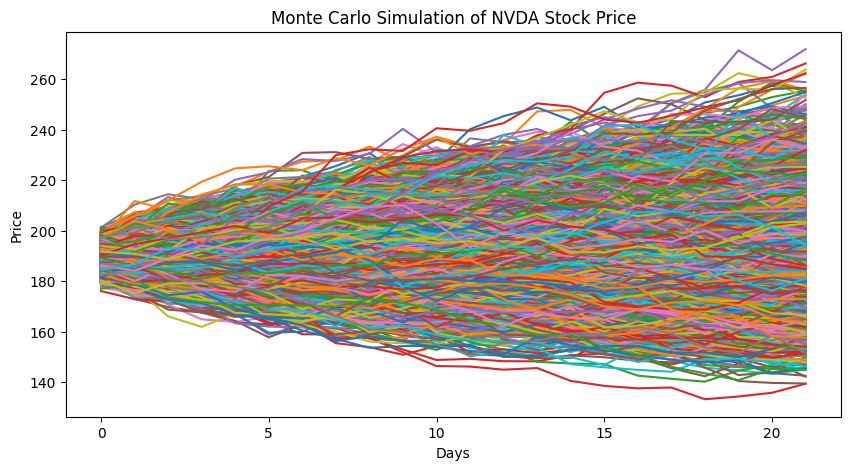

In [59]:
plt.figure(figsize=(10,5))
plt.plot(simulation_df)
plt.title('Monte Carlo Simulation of NVDA Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [60]:
print(f"The most likely simulation's final price is: {most_likely_simulation_[-1]}")

The most likely simulation's final price is: 192.9889640573329
